James Walton
BMDS 566
9/15/2025
Honor Statement:

The Air Quality Index (AQI) is an index for reporting daily air quality. It tells you how clean
or polluted your air is, and what associated health effects might be a concern for you. The
AQI focuses on health effects you may experience within a few hours or days after breathing
polluted air. The AQI is reported according to the Environmental Protection Agency's scale.
The Health Department obtains the pollen forecast from Pollen.com. Pollen forecasts are
based on a variety of environmental and seasonal factors, including past and current pollen
counts over the past 24 - 72 hours and the weather conditions. The pollen forecasts estimate
how much pollen an allergy sufferer is likely to be exposed to in the future. The pollen
forecast is currently reported on a scale of 0 to 12 as follows:
Pollen Count Pollen Level
0.0 to 2.4 Low
2.5 to 4.8 Low – Medium
4.9 to 7.2 Medium
7.3 to 9.6 Medium – High
9.7 to 12.0 High
Source:
1. https://data.nashville.gov/datasets/Nashville::air-quality-and-pollen-count/about
2. https://www.nashville.gov/departments/health/environmental-health/air-pollutioncontrol/
daily-aqi-and-pollen-count

**Question 1: Explore the data by plotting AQI and Category across the years in two separate
plots. Make sure they have proper labels and titles. Use a datetime format for the dates.
a. How many times has the AQI been recorded above 120?
b. When did the Air Quality Index Category become unhealthy?**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
data = pd.read_csv('/Users/jameswalton/Desktop/MSBD 566/Assignment 1/Air_Quality_and_Pollen_Count.csv')
cleaned_data = data.copy()
display(data.head())
data.columns
data.info()
data.describe()

,OBJECTID,AQI,Category,ResponsiblePollutant,PollenCount,PollenType,PollenDescription,ReportDateTime
0,1,47.0,Good,PM2.5,9.0,Juniper,Maple,2025/04/04 05:00:00+00
1,2,49.0,Good,PM2.5,1.0,Elm,Juniper,2025/04/03 05:00:00+00
2,3,51.0,Moderate,PM2.5,11.0,Elm,Juniper,2025/04/02 05:00:00+00
3,4,50.0,Good,PM2.5,10.0,Elm,Juniper,2025/04/01 05:00:00+00
4,5,50.0,Good,PM2.5,2.0,Elm,Juniper,2025/03/31 05:00:00+00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8920 entries, 0 to 8919
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              8920 non-null   int64  
 1   AQI                   8692 non-null   float64
 2   Category              8920 non-null   object 
 3   ResponsiblePollutant  8690 non-null   object 
 4   PollenCount           5075 non-null   float64
 5   PollenType            4687 non-null   object 
 6   PollenDescription     8800 non-null   object 
 7   ReportDateTime        8920 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 557.6+ KB


,OBJECTID,AQI,PollenCount
count,8920.000000,8692.000000,5075.000000
mean,4460.500000,45.268293,16.173596
std,2575.126534,16.603862,67.429182
min,1.000000,0.000000,0.000000
25%,2230.750000,34.000000,3.000000
50%,4460.500000,44.000000,6.000000
75%,6690.250000,52.000000,9.000000
max,8920.000000,151.000000,1666.000000


In [11]:
cleaned_data['ReportDateTime'] = pd.to_datetime(cleaned_data['ReportDateTime'])
cleaned_data['Year'] = cleaned_data['ReportDateTime'].dt.year

print("\n\nCleaned Data:")
display(cleaned_data.head())



Cleaned Data:


,OBJECTID,AQI,Category,ResponsiblePollutant,PollenCount,PollenType,PollenDescription,ReportDateTime,Year
0,1,47.0,Good,PM2.5,9.0,Juniper,Maple,2025-04-04 05:00:00+00:00,2025
1,2,49.0,Good,PM2.5,1.0,Elm,Juniper,2025-04-03 05:00:00+00:00,2025
2,3,51.0,Moderate,PM2.5,11.0,Elm,Juniper,2025-04-02 05:00:00+00:00,2025
3,4,50.0,Good,PM2.5,10.0,Elm,Juniper,2025-04-01 05:00:00+00:00,2025
4,5,50.0,Good,PM2.5,2.0,Elm,Juniper,2025-03-31 05:00:00+00:00,2025


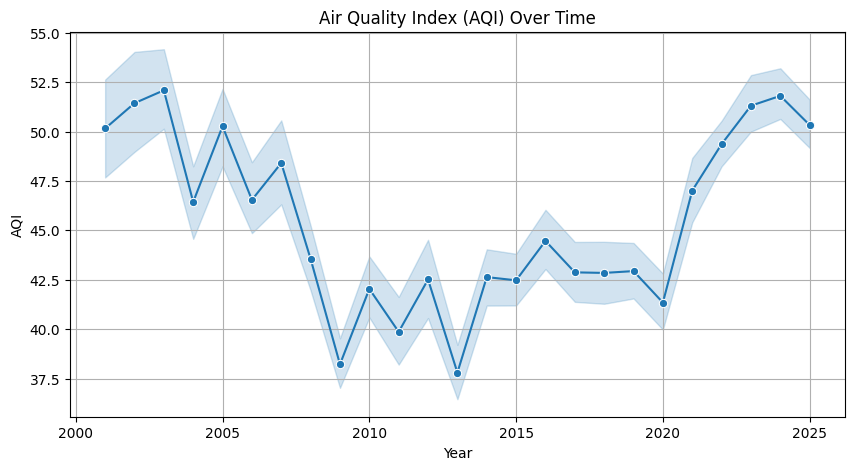

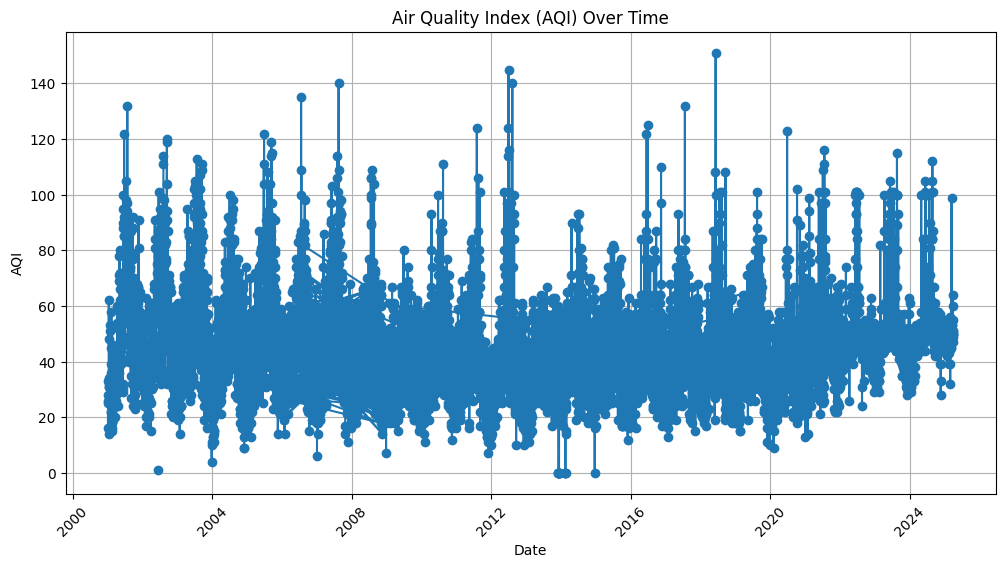

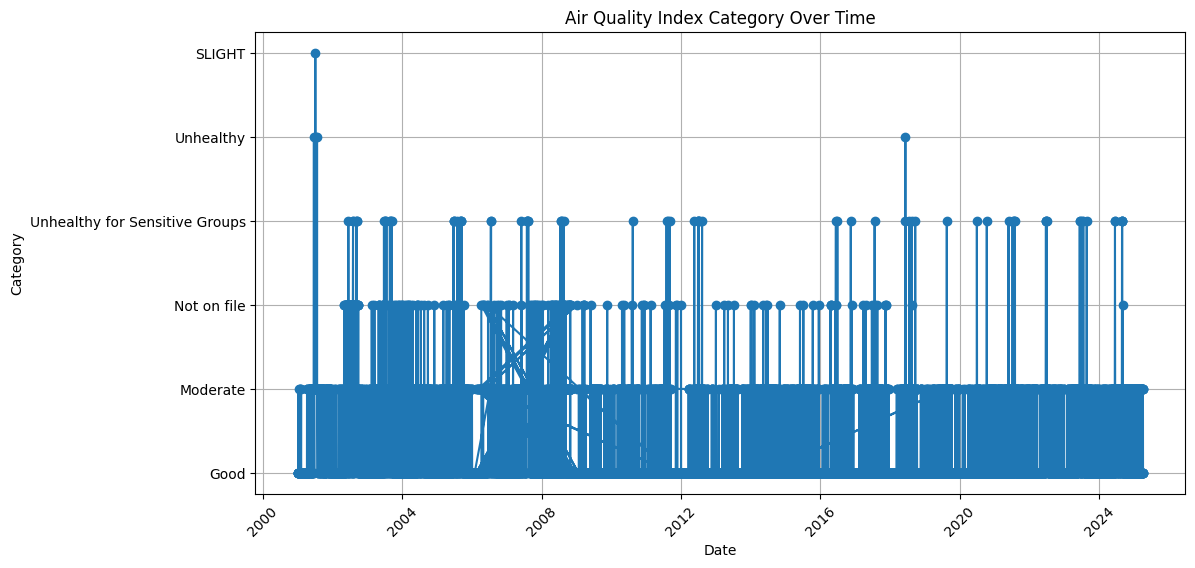

In [15]:
# Plot AQI over the years
plt.figure(figsize=(10,5))
sns.lineplot(data=cleaned_data, x='Year', y='AQI', marker='o')
plt.title('Air Quality Index (AQI) Over Time')
plt.xlabel('Year')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(cleaned_data['ReportDateTime'], cleaned_data['AQI'], marker='o')
plt.title("Air Quality Index (AQI) Over Time")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot AQI Category over the years
plt.figure(figsize=(12, 6))
plt.plot(cleaned_data['ReportDateTime'], cleaned_data['Category'], marker='o')
plt.title("Air Quality Index Category Over Time")
plt.xlabel("Date")
plt.ylabel("Category")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [17]:
# a. Count AQI values above 120
aqi_above_120 = (cleaned_data['AQI'] > 120).sum()
aqi_above_120



14

In [18]:
aqi_above_96 = (cleaned_data['AQI'] > 96).sum()
aqi_above_96

129

In [19]:
# b. Find dates when AQI Category became 'Unhealthy'
unhealthy_dates = cleaned_data.loc[cleaned_data['Category'].str.contains("Unhealthy", case=False), 'ReportDateTime']

unhealthy_dates.min(), unhealthy_dates.max()

(Timestamp('2001-06-21 05:00:00+0000', tz='UTC'),
 Timestamp('2024-08-29 05:00:00+0000', tz='UTC'))

**Question 2: Which pollen type occurs the most? Hint: You can use a scatterplot if needed.**

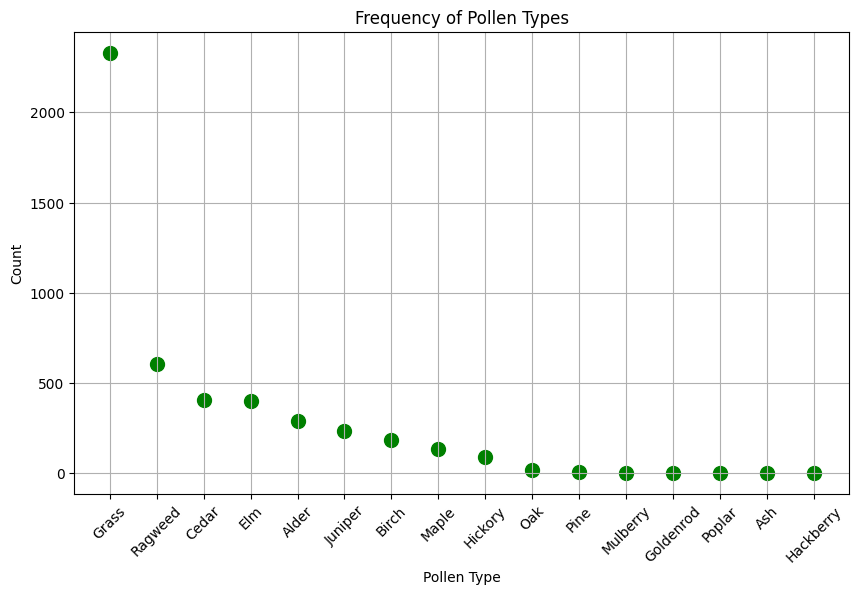

In [20]:
pollen_counts = data['PollenType'].value_counts()

# Scatter plot of pollen type frequency
plt.figure(figsize=(10, 6))
plt.scatter(pollen_counts.index, pollen_counts.values, color='green', s=100)
plt.title("Frequency of Pollen Types")
plt.xlabel("Pollen Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [21]:
# Which pollen type occurs the most
most_common_pollen = pollen_counts.idxmax()
most_common_count = pollen_counts.max()

most_common_pollen, most_common_count

('Grass', 2330)

**Question 3: [Open-ended] Based on this data, do you think Nashville is a city that is
comfortable to live (based on the air quality and pollen only)? Why?**

Yes, because there are relatively few days of unhealthy levels. In the data we have only 14 unhealthy days above 12.0, though there are 129 days above 9.7 which is high.

**Question 4: [A vectorization problem]. Compare the manual approach versus a vectorized
approach to find the mean AQI for each Air Quality Category ('Category' in the table).
For the vectorized method, you can use groupby() and mean() method in pandas datatype
(ex: data.groupby('ColumnName') and dataList.mean()). For the manual method, a
regular for-loop can be used. Calculate the time difference between the two approaches and
evaluate.**

In [22]:
import time
start_vec = time.time()
vectorized_result = data.groupby('Category')['AQI'].mean()
end_vec = time.time()
time_vec = end_vec - start_vec

In [23]:
start_manual = time.time()
manual_result = {}
for category in data['Category'].unique():
    subset = data[data['Category'] == category]
    manual_result[category] = subset['AQI'].mean()
end_manual = time.time()
time_manual = end_manual - start_manual

In [26]:
manual_result_series = pd.Series(manual_result)

vectorized_result, manual_result_series, time_vec, time_manual, time_manual/time_vec

(Category
 Good                               36.966283
 Moderate                           62.240840
 Not on file                              NaN
 SLIGHT                             60.000000
 Unhealthy                         127.500000
 Unhealthy for Sensitive Groups    110.078947
 Name: AQI, dtype: float64,
 Good                               36.966283
 Moderate                           62.240840
 Not on file                              NaN
 Unhealthy for Sensitive Groups    110.078947
 Unhealthy                         127.500000
 SLIGHT                             60.000000
 dtype: float64,
 0.0035839080810546875,
 0.007742166519165039,
 2.160258116019159)

The vectorized approach time was 0.00358, while the manual approach time was 0.00774. The manual loop was slightly longer than the vectorized method.